In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
listings = pd.read_csv('listings.csv')
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [3]:
rev = pd.read_csv('reviews.csv')
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [4]:
calendar = pd.read_csv('calendar.csv')
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


### Data Cleaning

In [5]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [6]:
calendar['date'] = pd.to_datetime(calendar['date'])

In [7]:
calendar['price'] = calendar.price.str[1:].str.replace(',', '').astype('float')

In [8]:
calendar['available'] = np.where(calendar['available'] == 't', True, False)

In [9]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null datetime64[ns]
available     1308890 non-null bool
price         643037 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 31.2 MB


In [10]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [11]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [12]:
rev['date'] = pd.to_datetime(rev['date'], errors = 'raise')

In [14]:
listings.iloc[0]

id                                                                           12147973
listing_url                                     https://www.airbnb.com/rooms/12147973
scrape_id                                                              20160906204935
last_scraped                                                               2016-09-07
name                                                       Sunny Bungalow in the City
summary                             Cozy, sunny, family home.  Master bedroom high...
space                               The house has an open and cozy feel at the sam...
description                         Cozy, sunny, family home.  Master bedroom high...
experiences_offered                                                              none
neighborhood_overview               Roslindale is quiet, convenient and friendly. ...
notes                                                                             NaN
transit                             The bus stop is 2 

In [15]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [16]:
cols_to_drop = ['has_availability', 'calendar_last_scraped', 'requires_license', 'license', 'jurisdiction_names',
               'listing_url', 'scrape_id', 'experiences_offered', 'thumbnail_url', 'medium_url', 'picture_url',
               'xl_picture_url', 'host_url', 'last_scraped', 'host_thumbnail_url', 'host_picture_url',
               'smart_location', 'calendar_last_scraped']

In [17]:
cols_to_datetime = ['first_review', 'last_review']

In [18]:
cols_to_clean = ['host_response_rate', 'host_acceptance_rate', 'host_verifications',
                'price', 'security_deposit', 'cleaning_fee', 'extra_people']

In [19]:
cols_to_category = ['host_response_time', 'host_neighbourhood', 'neighbourhood', 'property_type',
                   'room_type', 'bed_type', 'cancellation_policy']

In [20]:
cols_to_bool = ['instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification',
               'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact']

In [21]:
def to_bool(df, cols):
    
    for col in cols:
        df[col] = np.where(df[col] == 't', True, False)
        
    return df

In [22]:
def to_category(df, cols):
     
    for col in cols:
        df[col] = df[col].astype('category')
        
    return df

In [23]:
def to_datetime(df, cols):
    
    for col in cols:
        df[col] = pd.to_datetime(df[col], errors = 'raise')
        
    return df

In [24]:
listings.drop(cols_to_drop, axis = 1, inplace = True)

In [25]:
listings = to_bool(listings, cols_to_bool)

In [26]:
listings = to_category(listings, cols_to_category)

In [27]:
listings = to_datetime(listings, cols_to_datetime)

In [28]:
listings = to_datetime(listings, ['host_since'])

In [29]:
listings['host_response_rate'] = listings['host_response_rate'].str[:-1].astype('float')/100

In [30]:
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str[:-1].astype('float')/100

In [31]:
def clean_price(df, cols):
    
    for col in cols:
        df[col] = df[col].str[1:].str.replace(',', '').astype('float')
    
    return df

In [32]:
cols_to_clean_price = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']

In [33]:
listings = clean_price(listings, cols_to_clean_price)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
cv = CountVectorizer()
cv.fit(listings.amenities.str[1:-1])
amens = cv.transform(listings.amenities.str[1:-1])

In [36]:
amens = pd.DataFrame(amens.toarray(),columns = cv.get_feature_names())

In [37]:
amens.head()

,24,accessible,aid,air,allowed,bedroom,breakfast,building,buzzer,cable,...,street,suitable,this,translation,tub,tv,washer,wheelchair,wireless,workspace
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,1
1,0,0,0,1,1,1,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
2,0,0,1,1,0,1,0,0,0,1,...,0,0,0,2,0,2,1,0,1,0
3,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,1,1
4,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
amens = amens.T.drop_duplicates()
amens = amens.T

In [39]:
amens = amens.replace(2, 1)

In [40]:
cv_host = CountVectorizer()
host_verif = cv_host.fit_transform(listings.host_verifications.str[1:-1])

In [41]:
host_verif = pd.DataFrame(host_verif.toarray(), columns = cv_host.get_feature_names())

In [42]:
host_verif.T.duplicated() # host_verif is OK

amex              False
email             False
facebook          False
google            False
jumio             False
kba               False
linkedin          False
manual_offline    False
manual_online     False
phone             False
reviews           False
sent_id           False
weibo             False
dtype: bool

In [43]:
host_verif.shape

(3585, 13)

In [44]:
listings.drop(['amenities', 'host_verifications'], axis = 1, inplace = True)

In [45]:
listings.columns

Index(['id', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'country_code', 'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availab

In [46]:
final_cols_to_drop = ['name', 'summary', 'space', 'description', 'neighborhood_overview',
                     'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_name',
                      'host_location', 'host_about', 'host_neighbourhood', 'street',
                      'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
                      'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
                      'country_code', 'country', 'weekly_price', 'monthly_price']

In [47]:
listings.drop(final_cols_to_drop, axis = 1, inplace = True)
listings.shape

(3585, 51)

In [48]:
listings.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,31303940,2015-04-15,NaN,NaN,NaN,False,1,1,True,...,NaN,NaN,NaN,NaN,False,moderate,False,False,1,NaN
1,3075044,2572247,2012-06-07,within an hour,1.0,1.00,False,1,1,True,...,10.0,10.0,9.0,9.0,True,moderate,False,False,1,1.30
2,6976,16701,2009-05-11,within a few hours,1.0,0.88,True,1,1,True,...,10.0,10.0,9.0,10.0,False,moderate,True,False,1,0.47
3,1436513,6031442,2013-04-21,within a few hours,1.0,0.50,False,1,1,True,...,10.0,10.0,10.0,10.0,False,moderate,False,False,1,1.00
4,7651065,15396970,2014-05-11,within an hour,1.0,1.00,True,1,1,True,...,10.0,10.0,9.0,10.0,False,flexible,False,False,1,2.25


### Exploratory Data Analysis

In [49]:
listings.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,31303940,2015-04-15,NaN,NaN,NaN,False,1,1,True,...,NaN,NaN,NaN,NaN,False,moderate,False,False,1,NaN
1,3075044,2572247,2012-06-07,within an hour,1.0,1.00,False,1,1,True,...,10.0,10.0,9.0,9.0,True,moderate,False,False,1,1.30
2,6976,16701,2009-05-11,within a few hours,1.0,0.88,True,1,1,True,...,10.0,10.0,9.0,10.0,False,moderate,True,False,1,0.47
3,1436513,6031442,2013-04-21,within a few hours,1.0,0.50,False,1,1,True,...,10.0,10.0,10.0,10.0,False,moderate,False,False,1,1.00
4,7651065,15396970,2014-05-11,within an hour,1.0,1.00,True,1,1,True,...,10.0,10.0,9.0,10.0,False,flexible,False,False,1,2.25


In [50]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null datetime64[ns]
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.1+ MB


In [51]:
base_color = sns.color_palette()[0]

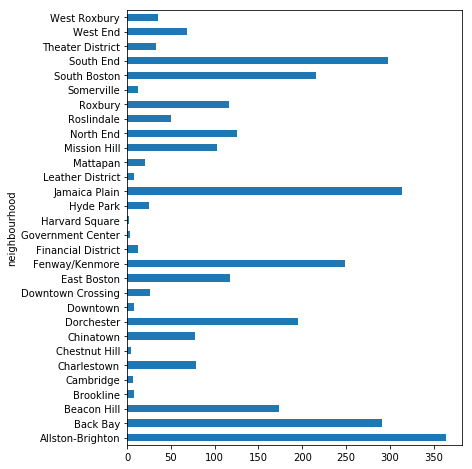

In [52]:
listings.groupby('neighbourhood').id.size().plot(kind = 'barh', color = base_color, figsize = (6, 8));

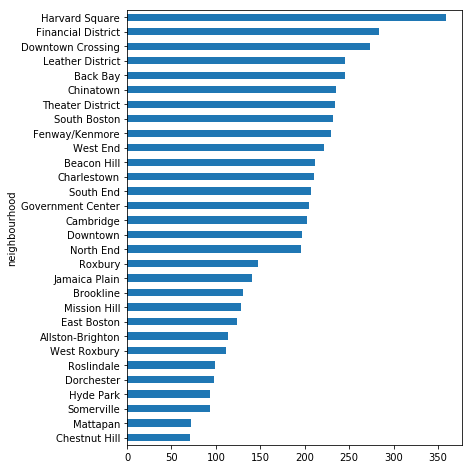

In [53]:
listings.groupby('neighbourhood').price.mean().sort_values().plot(kind = 'barh', color = base_color, figsize = (6, 8));

In [54]:
calendar = pd.merge(left = calendar, right = listings[['id', 'neighbourhood']], right_on = 'id', left_on = 'listing_id', how = 'left')

In [55]:
df = calendar[calendar.available == True].groupby(['neighbourhood', 'date']).price.mean().reset_index()

In [56]:
df.head()

,neighbourhood,date,price
0,Allston-Brighton,2016-09-06,162.600000
1,Allston-Brighton,2016-09-07,148.072464
2,Allston-Brighton,2016-09-08,146.974359
3,Allston-Brighton,2016-09-09,150.342857
4,Allston-Brighton,2016-09-10,152.471429


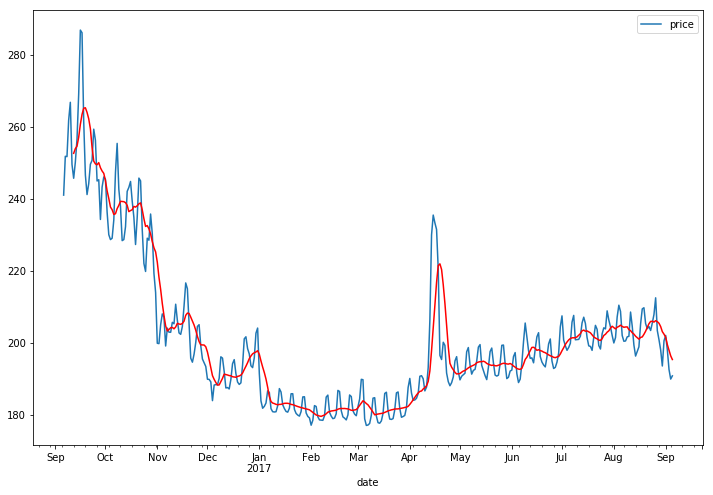

In [57]:
pd.DataFrame(calendar[calendar.price.notnull()].groupby('date').price.mean()).reset_index().plot('date', 'price', kind = 'line', figsize = (12, 8));
calendar[calendar.price.notnull()].groupby('date').price.mean().rolling(window = 7, center = False).mean().plot(kind = 'line', color = 'r');

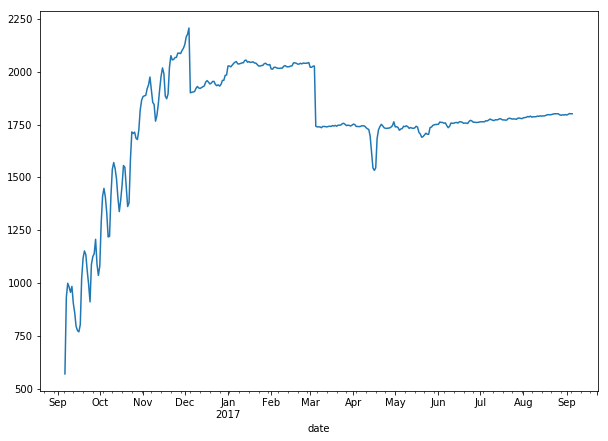

In [58]:
calendar[calendar.available == True].groupby('date').listing_id.count().plot(kind = 'line',figsize = (10, 7));

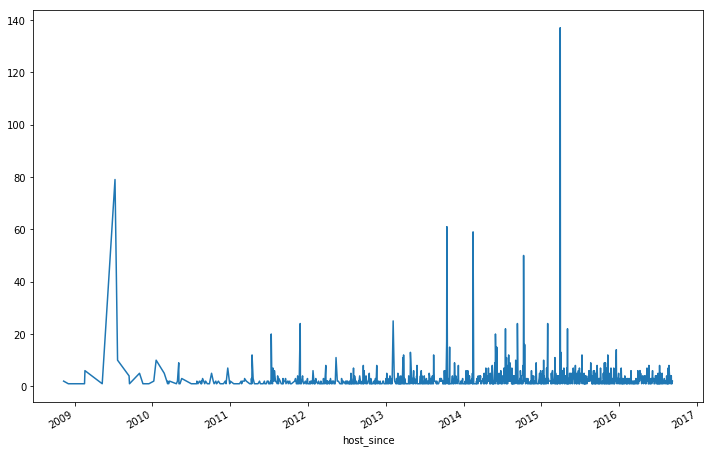

In [59]:
listings.groupby('host_since').id.count().plot(kind = 'line', figsize = (12, 8));

In [60]:
rev = pd.merge(left = rev, right = listings[['id', 'neighbourhood']], left_on = 'listing_id', right_on = 'id', how = 'left')

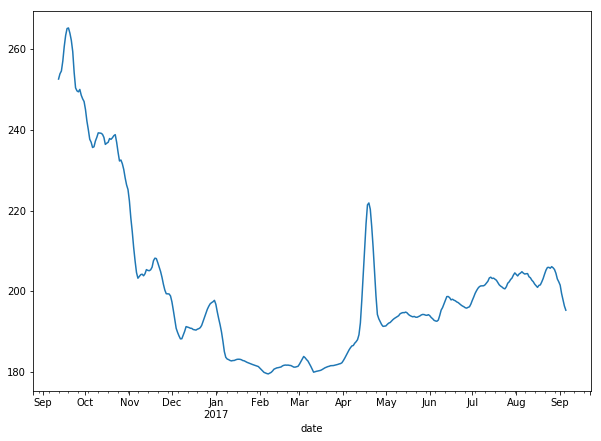

In [61]:
calendar[calendar.price.notnull()].groupby('date').price.mean().rolling(window = 7, center = False).mean().plot(kind = 'line',figsize = (10, 7));

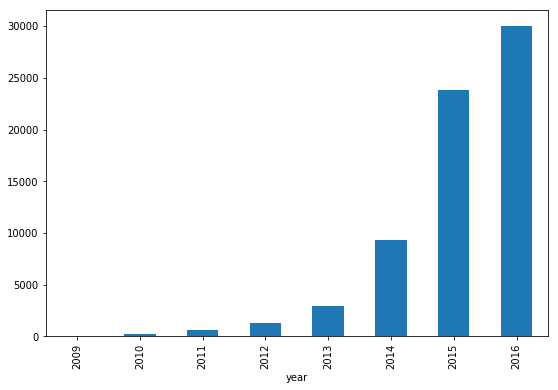

In [62]:
plt.figure(figsize = (9, 6))
rev.groupby(rev.date.dt.year).comments.size().plot(kind = 'bar', color = base_color);
plt.xlabel('year');

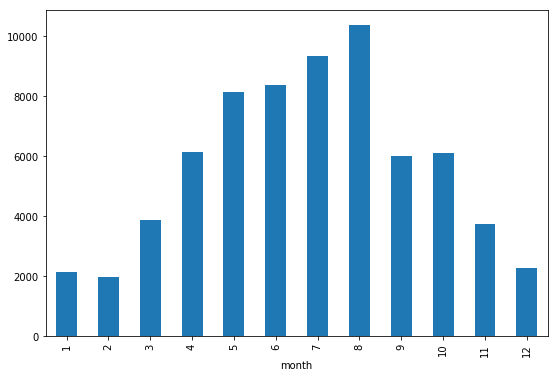

In [63]:
plt.figure(figsize = (9, 6))
rev.groupby(rev.date.dt.month).comments.size().plot(kind = 'bar', color = base_color);
plt.xlabel('month');

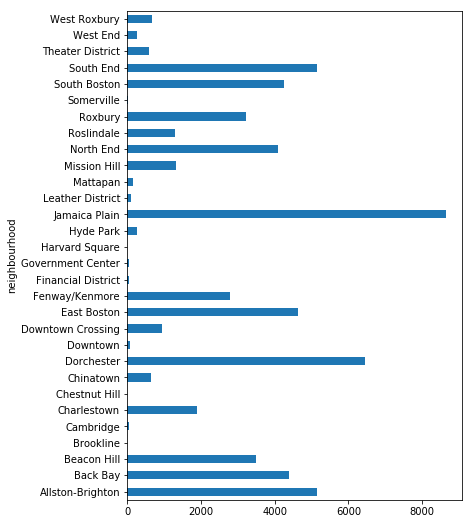

In [64]:
rev.groupby('neighbourhood').comments.count().plot(kind= 'barh', color = base_color,figsize = (6, 9));

In [65]:
new = calendar[calendar.available == True].groupby(['neighbourhood', 'date']).price.mean().reset_index()

In [66]:
price_table = pd.pivot_table(data = new, index = 'date', columns = 'neighbourhood', values = 'price')

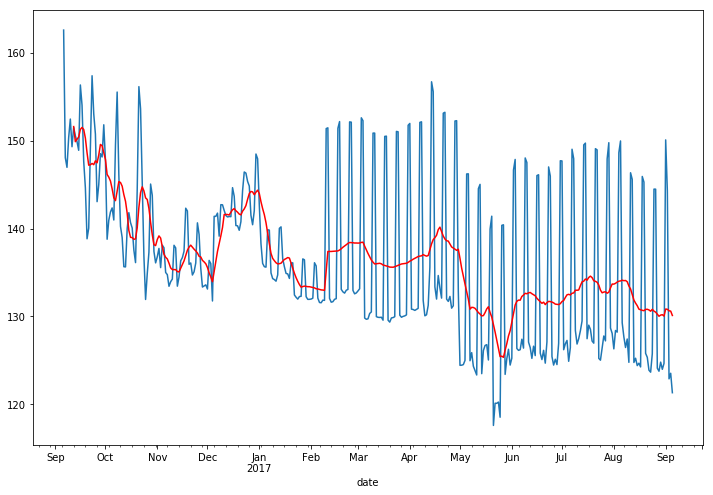

In [67]:
price_table['Allston-Brighton'].plot(figsize =(12, 8));
price_table['Allston-Brighton'].rolling(window = 7, center = False).mean().plot(color = 'r');

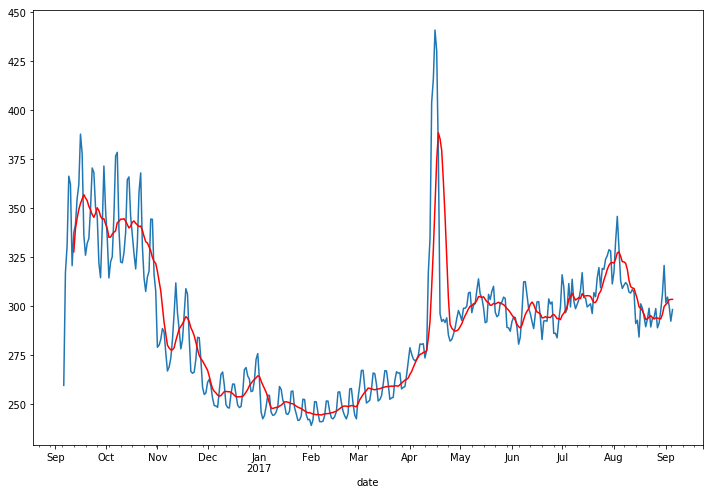

In [68]:
price_table['Back Bay'].plot(figsize =(12, 8));
price_table['Back Bay'].rolling(window = 7, center = False).mean().plot(color = 'r');

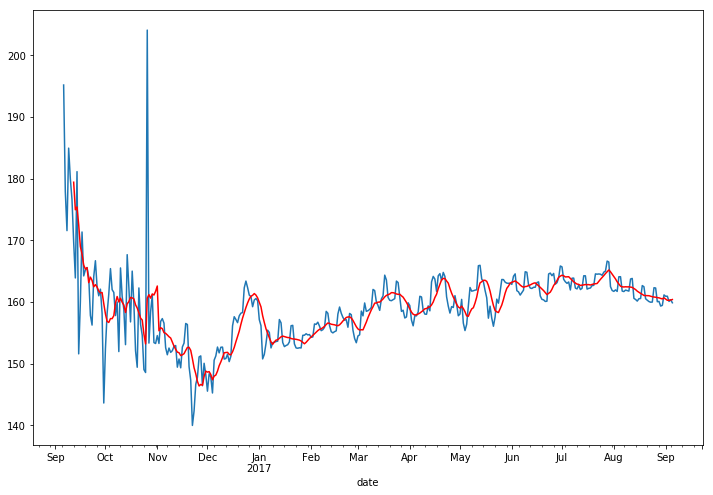

In [69]:
price_table['Jamaica Plain'].plot(figsize =(12, 8));
price_table['Jamaica Plain'].rolling(window = 7, center = False).mean().plot(color = 'r');

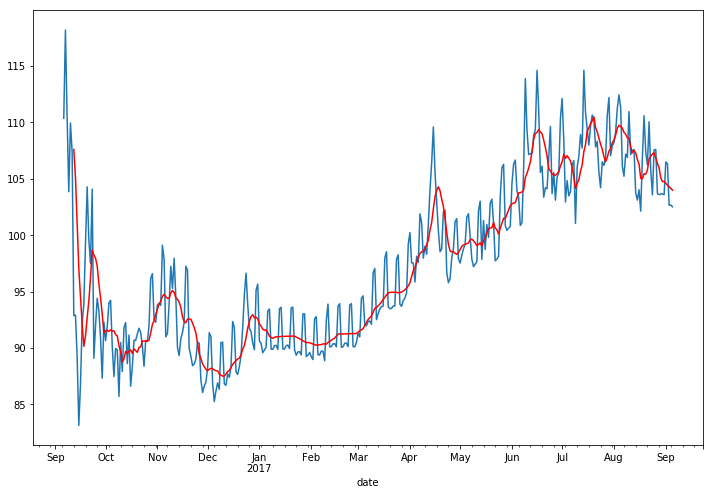

In [70]:
price_table['Dorchester'].plot(figsize =(12, 8));
price_table['Dorchester'].rolling(window = 7, center = False).mean().plot(color = 'r');

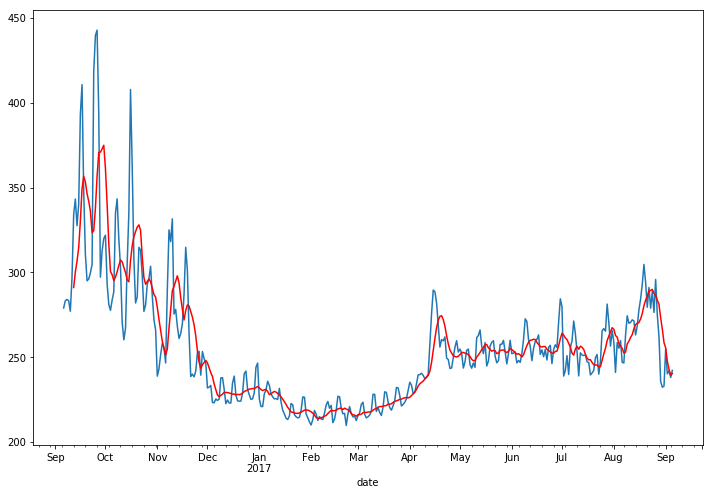

In [71]:
price_table['South Boston'].plot(figsize =(12, 8));
price_table['South Boston'].rolling(window = 7, center = False).mean().plot(color = 'r');

In [72]:
price_table.columns

CategoricalIndex(['Allston-Brighton', 'Back Bay', 'Beacon Hill', 'Brookline',
                  'Cambridge', 'Charlestown', 'Chestnut Hill', 'Chinatown',
                  'Dorchester', 'Downtown', 'Downtown Crossing', 'East Boston',
                  'Fenway/Kenmore', 'Financial District', 'Government Center',
                  'Harvard Square', 'Hyde Park', 'Jamaica Plain',
                  'Leather District', 'Mattapan', 'Mission Hill', 'North End',
                  'Roslindale', 'Roxbury', 'Somerville', 'South Boston',
                  'South End', 'Theater District', 'West End', 'West Roxbury'],
                 categories=['Allston-Brighton', 'Back Bay', 'Beacon Hill', 'Brookline', 'Cambridge', 'Charlestown', 'Chestnut Hill', 'Chinatown', ...], ordered=False, name='neighbourhood', dtype='category')

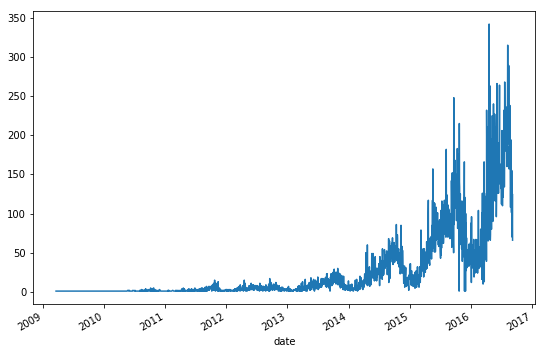

In [73]:
plt.figure(figsize = (9, 6))
rev.groupby('date').comments.size().plot(kind = 'line');

In [74]:
calendar['day'] = calendar.date.dt.day_name()

In [75]:
calendar.head()

,listing_id,date,available,price,id,neighbourhood,day
0,12147973,2017-09-05,False,NaN,12147973,Roslindale,Tuesday
1,12147973,2017-09-04,False,NaN,12147973,Roslindale,Monday
2,12147973,2017-09-03,False,NaN,12147973,Roslindale,Sunday
3,12147973,2017-09-02,False,NaN,12147973,Roslindale,Saturday
4,12147973,2017-09-01,False,NaN,12147973,Roslindale,Friday


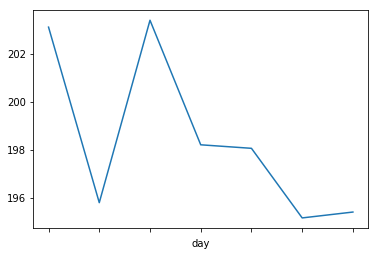

In [76]:
calendar[calendar.available == True].groupby('day').price.mean().plot(); #fix this

In [77]:
listing_num = listings.groupby('host_since').id.size().reset_index()
listing_num['cumulative'] = listing_num.id.cumsum()

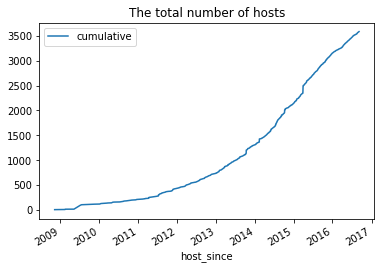

In [78]:
listing_num.plot('host_since', 'cumulative');
plt.title('The total number of hosts');

### Predicting Price

In [79]:
amens = amens.drop(['hosting_amenity_49', 'hosting_amenity_50', 'en'], axis = 1)

In [80]:
cols_categories = ['host_response_time', 'neighbourhood', 'property_type', 'room_type', 'bed_type',
                  'cancellation_policy'] # calendar_updated a bak.

cols_dt = ['host_since', 'first_review', 'last_review']

In [81]:
today = pd.to_datetime('2016-09-06')

In [82]:
listings['host_duration'] = (today - listings.host_since).dt.days
listings['first_review_dur'] = (today - listings.first_review).dt.days
listings['last_review_dur'] = (today - listings.last_review).dt.days

In [83]:
listings.drop(cols_dt, axis = 1, inplace = True)

In [84]:
dummies = pd.get_dummies(listings[cols_categories])

In [85]:
listings.drop(cols_categories, axis = 1, inplace = True)

In [86]:
listings.drop(['id', 'host_id'], axis = 1, inplace = True)

In [87]:
listings.drop('calendar_updated', axis = 1, inplace = True) # buna sonra bakmak gerekir

In [88]:
final = pd.concat([listings, dummies, amens, host_verif], axis = 1)

In [89]:
final.drop(['security_deposit'], axis = 1, inplace = True)

In [90]:
final.drop(['square_feet'], axis = 1, inplace = True)

In [91]:
cols_to_impute = ['host_response_rate', 'host_acceptance_rate', 'review_scores_rating',
                 'review_scores_accuracy', 'review_scores_cleanliness', 'cleaning_fee',
                 'review_scores_checkin', 'review_scores_communication', 
                 'bathrooms', 'bedrooms', 'review_scores_location', 'review_scores_value',
                 'reviews_per_month', 'first_review_dur', 'last_review_dur']

In [92]:
final[cols_to_impute] = final[cols_to_impute].apply(lambda x: x.fillna(x.mean()), axis = 0)

In [93]:
final.to_csv('final.csv', index = False)

In [94]:
final.shape

(3585, 161)

In [95]:
final.dropna(inplace = True)

In [174]:
backed = final.copy()

In [179]:
backed.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,...,google,jumio,kba,linkedin,manual_offline,manual_online,phone,reviews,sent_id,weibo
0,0.949891,0.841731,False,1,1,True,False,42.282619,-71.133068,True,...,0,0,0,0,0,0,1,1,0,0
1,1.000000,1.000000,False,1,1,True,True,42.286241,-71.134374,True,...,0,1,0,1,0,0,1,1,0,0
2,1.000000,0.880000,True,1,1,True,True,42.292438,-71.135765,True,...,0,1,0,0,0,0,1,1,0,0
3,1.000000,0.500000,False,1,1,True,False,42.281106,-71.121021,False,...,0,0,0,0,0,0,1,1,0,0
4,1.000000,1.000000,True,1,1,True,True,42.284512,-71.136258,True,...,0,0,1,0,0,0,1,1,0,0


In [201]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler

In [182]:
scaler = StandardScaler()
final= scaler.fit_transform(backed)
final = pd.DataFrame(final, columns = backed.columns)

In [215]:
y = backed.price.copy()
X = backed.drop('price', axis = 1).copy()

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [223]:
ada = RandomForestRegressor(n_estimators = 300, random_state = 42)
score = cross_val_score(ada, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)

In [224]:
score.mean()

-3219.698586393648

In [225]:
(-score.mean())**0.5

56.74238791585747

In [226]:
ada.fit(X_train, y_train)
y_pred= ada.predict(X_test)
mse(y_test, y_pred)

3342.6750136220962

In [194]:
from sklearn.linear_model import LinearRegression

In [199]:
lm = LinearRegression()

In [214]:
backed = backed[backed.price <= 600]

In [217]:
lm.fit(X_train, y_train)
lm_pred = lm.predict(X_test)
mse(y_test, lm_pred)

529500276.65302485

In [218]:
mse(y_test, lm_pred) ** 0.5

23010.873009362876

### Most Frequent Words to Describe Neghbourhoods

In [227]:
listing = pd.read_csv('listings.csv')

In [247]:
listing = listing[['neighbourhood_cleansed', 'name', 'summary', 'description']]

In [249]:
listing.dropna(inplace = True)

C:\Users\ilknur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [252]:
listing['total'] = listing.apply(lambda row: ' '.join(row[i] for i in ['name', 'summary', 'description']), axis = 1)

In [255]:
y = listing.neighbourhood_cleansed
X = listing.total

In [269]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [278]:
pipeline = Pipeline([('vect', TfidfVectorizer(stop_words = 'english', sublinear_tf = True, ngram_range = (1, 2))),
                    ('chi2', SelectKBest(chi2, k = 1000)),
                    ('clf', LinearSVC(penalty = 'l1', dual = False))])

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [279]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
  ...ax_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0))])

In [283]:
vect = pipeline.named_steps['vect']
chi = pipeline.named_steps['chi2']
clf = pipeline.named_steps['clf']

In [280]:
feature_names = vect.get_feature_names()
feature_names = [feature_names[i] for i in chi.get_support(indices = True)]
feature_names = np.asarray(feature_names)

In [300]:
y_values = y_train.unique().tolist()


for i, value in enumerate(y_values):
    top_indices = np.argsort(clf.coef_[i])[-10:]
    top_words = feature_names[top_indices]
    print(value,'----', ', '.join(top_words))

Allston ---- downtown nearest, dryer 40, walk harvard, harvard square, harvard business, boston university, bu, 66, harvard, allston
Dorchester ---- prudential, river, newbury street, gardens, historic bay, heart bay, newbury, copley, landscaped gardens, bay
Back Bay ---- dog bathrooms, donuts ice, yoga studio, swan, village, ac washer, arlington, loews regency, dryer 40, bay village
Downtown ---- dorchester, dog cat, dog bathrooms, district walking, donuts ice, charles street, charles, plasma tv, mgh, beacon hill
South End ---- dorchester, donuts ice, dog cat, harvard, harvard square, bc, cleveland, boston college, square direct, brighton
Brighton ---- district walking, district high, district explore, yoga studio, freedom trail, bunker hill, bunker, distance target, charlestown, sullivan
North End ---- boston financial, chef style, theater, edge downtown, cardio theater, tufts medical, situated edge, attended desk, center yoga, chinatown
East Boston ---- dryer addition, dryer 40, dry

In [292]:
np.argsort(clf.coef_[i])[-10:]

array([329, 328, 327, 330, 999, 440, 438, 429, 956, 984], dtype=int64)

Inspiration

Can you describe the vibe of each Boston neighborhood using listing descriptions?

What are the busiest times of the year to visit Boston? By how much do prices spike?

Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Boston?

In [103]:
rev.shape

(68275, 8)

In [111]:
from wordcloud import WordCloud, STOPWORDS

In [114]:
chinatown = rev[rev.neighbourhood == 'Chinatown'].comments.reset_index(drop = True)

In [115]:
chinatown.head()

0    The host canceled this reservation 4 days befo...
1    Overall, a great room in a comfortable apartme...
2    Beautiful apartment.  Very comfortable!  Host ...
3    Amazing, high rise unit with city views and al...
4    Great location and great unit. The check-in pr...
Name: comments, dtype: object

In [116]:
text_chinatown = ' '.join(review for review in chinatown)

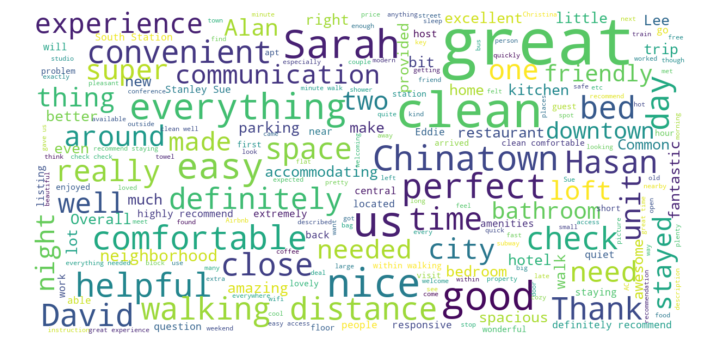

In [117]:
stopwords = set(STOPWORDS)
stopwords.update(['apartment', 'location', 'area', 'room', 'Boston', 'stay', 'building', 'house', 'host', 'place'])
wordcloud = WordCloud(stopwords = stopwords,
                     background_color = 'white',
                     max_font_size = 40,
                     scale = 3,
                     random_state = 42,
                     max_words = 300).generate(text_chinatown)
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

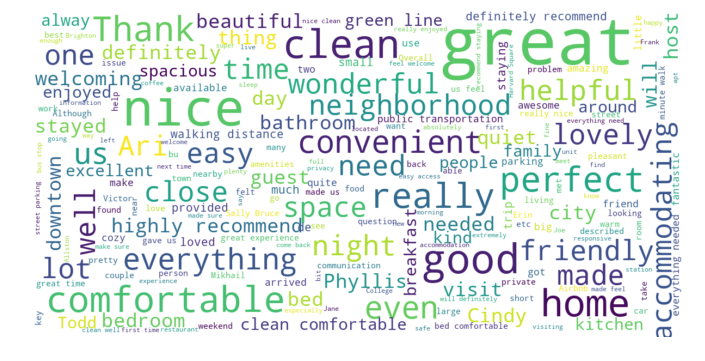

In [118]:
text_allston = ' '.join(review for review in rev[rev.neighbourhood == 'Allston-Brighton'].comments.reset_index(drop = True).dropna())
wordcloud = WordCloud(stopwords = stopwords,
                     background_color = 'white',
                     max_font_size = 40,
                     scale = 3,
                     random_state = 42,
                     max_words = 300).generate(text_allston)
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

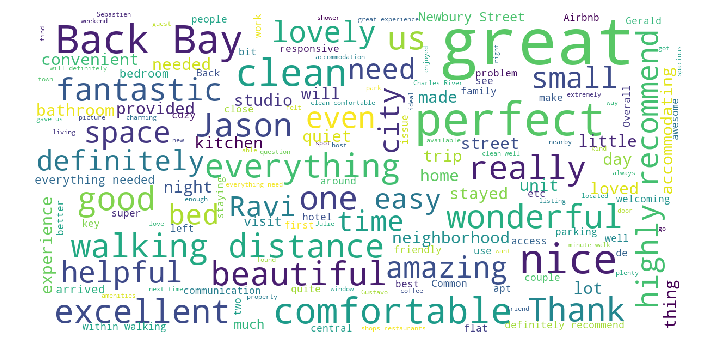

In [121]:
text_backbay = ' '.join(review for review in rev[rev.neighbourhood == 'Back Bay'].comments.reset_index(drop = True).dropna())
wordcloud = WordCloud(stopwords = stopwords,
                     background_color = 'white',
                     max_font_size = 40,
                     scale = 3,
                     random_state = 42,
                     max_words = 300).generate(text_backbay)
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud)
plt.axis("off");

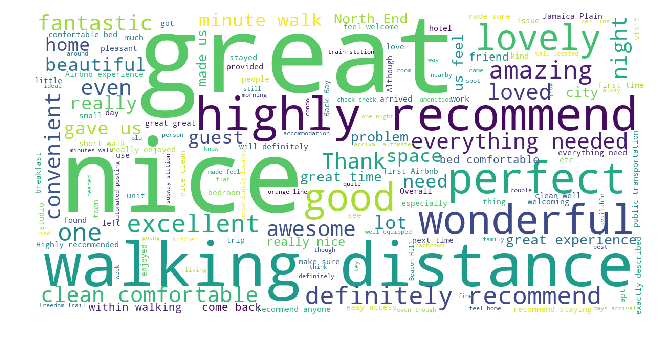

In [120]:
stopwords = set(STOPWORDS)
stopwords.update(['apartment', 'location', 'area', 'room', 'Boston', 'stay', 'building', 'house', 'host', 'place'])

text_boston = ' '.join(review for review in rev.comments.dropna())
wordcloud = WordCloud(stopwords = stopwords,
                     background_color = 'white',
                     max_font_size = 70,
                     scale = 3,
                     random_state = 42,
                     max_words = 300,
                     contour_width=3, 
                     contour_color='steelblue').generate(text_boston)

plt.figure(figsize = (11, 7))
plt.imshow(wordcloud) #interpolation='bilinear')
plt.axis("off");

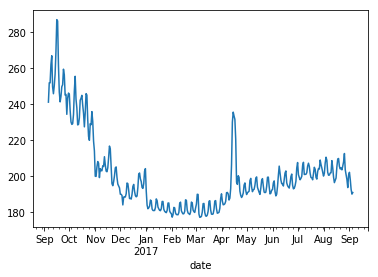

In [122]:
calendar.groupby('date').price.mean().plot(kind = 'line');

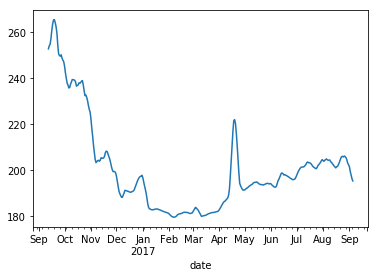

In [123]:
calendar.groupby('date').price.mean().rolling(window= 7, center = False).mean().plot(kind = 'line');

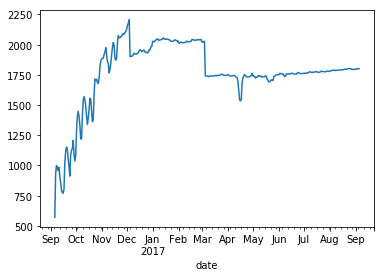

In [124]:
calendar[calendar.available == True].groupby('date').price.count().plot(kind = 'line');

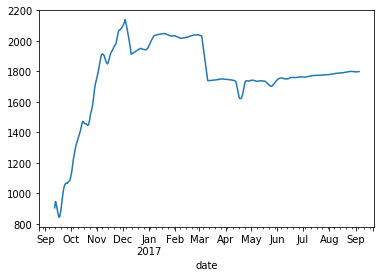

In [125]:
calendar[calendar.available == True].groupby('date').price.count().rolling(window= 7, center = False).mean().plot(kind = 'line');

In [127]:
# any upward trend in number of listings
plt.figure(figsize = (12, 6))
listings.groupby('host_since').id.size().plot(kind = 'line');

KeyError: 'host_since'

<Figure size 864x432 with 0 Axes>

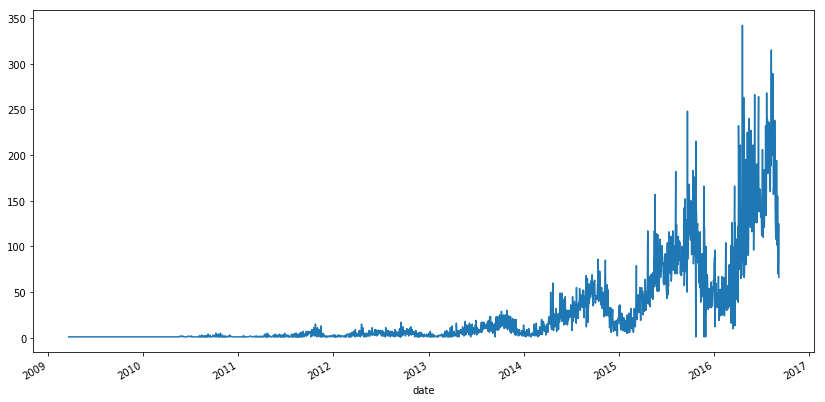

In [128]:
rev.groupby('date').comments.size().plot(kind = 'line',  figsize = (14, 7));

In [ ]:
hoods = listings.neighbourhood.unique().tolist()
for place in hoods:
    df_place = df[df.neighbourhood == place]
    df_place['price7'] = df_place.price.rolling(window = 7, center = False).mean()
    df_place.plot('date', 'price7', kind = 'line', figsize = (11, 7))
    plt.title(place)

In [189]:
rev.head()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,neighbourhood
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,1178162,East Boston
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,1178162,East Boston
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,1178162,East Boston
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,1178162,East Boston
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,1178162,East Boston
